In [30]:
import numpy as np
x = np.random.uniform(-1,1,100)
y = np.random.uniform(-1,1,100)
z = np.random.uniform(-1,1,100)
index = np.where(x**2 + y**2 + z**2 < 1, 1, 0)
# density = 2 # kg/m^3
# volume = 2 ** 3 # Sides of square = 2, m^3
mass = (8/100) * 2 * np.sum(index)
sigma = np.sqrt(np.mean([x**2 for x in index]) - np.mean(index)**2) # Standard deviation
uncertainty = sigma * 8/100 * 2
print(f'Mass = {mass}, Uncertainty = {uncertainty}')

Mass = 7.84, Uncertainty = 0.07998399839967991


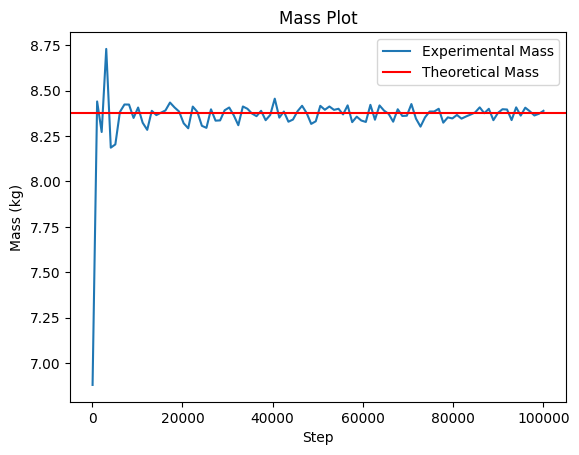

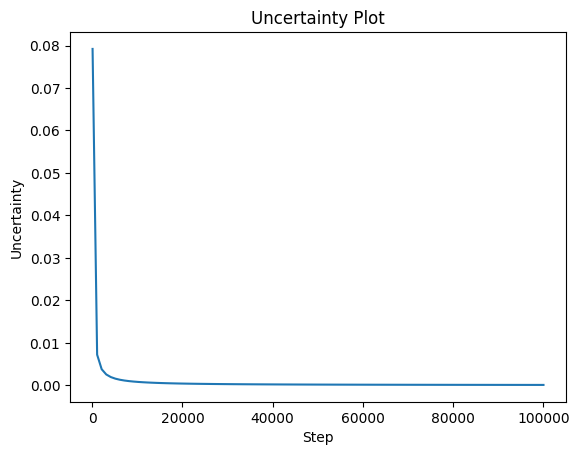

In [31]:
N = np.linspace(100,100000,100)
masses = []
uncertainties = []
def masscomp(N):
    x = np.random.uniform(-1,1,N)
    y = np.random.uniform(-1,1,N)
    z = np.random.uniform(-1,1,N)
    index = np.where(x**2 + y**2 + z**2 < 1, 1, 0)
    voln = 8/N
    mass = voln * 2 * np.sum(index)
    sigma = np.sqrt(np.mean([x**2 for x in index]) - np.mean(index)**2)
    uncertainty = sigma * voln * 2
    return mass, uncertainty
for i in range(len(N)):
    tempmass, tempuncert = masscomp(int(N[i]))
    masses.append(tempmass)
    uncertainties.append(tempuncert)
#Plots
import matplotlib.pyplot as plt
plt.plot(N,masses,label='Experimental Mass')
plt.axhline(8/3*np.pi,color='r',label='Theoretical Mass')
plt.xlabel('Step')
plt.ylabel('Mass (kg)')
plt.legend()
plt.title('Mass Plot')
plt.show()
plt.plot(N,uncertainties)
plt.xlabel('Step')
plt.ylabel('Uncertainty')
plt.title('Uncertainty Plot')
plt.show()
#Experimental math gets closer to theoretical mass & uncertainty decreases as N increases

In [32]:
def linmasscomp(N):
    x = np.random.uniform(-1,1,N)
    y = np.random.uniform(-1,1,N)
    z = np.random.uniform(-1,1,N)
    index = np.where(x**2 + y**2 + z**2 < 1, 1, 0)
    r = np.sqrt(x**2 + y**2 + z**2)
    fval = 2 * r
    V_N = 8 / N
    mass = V_N * np.sum(fval[index])
    sigma = np.sqrt(np.mean(fval[index]**2) - np.mean(fval[index])**2)
    uncertainty = sigma * V_N
    return mass, uncertainty

In [33]:
totalN = []
for i in range(100):
    error = 0.01
    N = 100
    count = 0
    for b in range(1000):
        m, u = linmasscomp(N)
        error = np.abs(m - (2*np.pi))/(2*np.pi)
        if error < error:
            count += 1
            if count == 5:
                break
        else:
            N += 10
            count = 0
    totalN.append(N)
print(f"Minimum N to achieve 1% error: {np.mean(totalN)}")

Minimum N to achieve 1% error: 10100.0


In [37]:
beta = 1 / (1 * 1.5)
magnetizations = []
lattice = np.ones((10, 10), dtype=int)
def energydelta(i, j, lattice):
    top = lattice[(i-1)%10, j]
    bottom = lattice[(i+1)%10, j]
    left = lattice[i, (j-1)%10]
    right = lattice[i, (j+1)%10]
    delta_E = lattice[i, j] * (top + bottom + left + right)
    return delta_E
# Monte Carlo simulation
for b in range(10000):
    i, j = np.random.randint(1, 10, 2)
    delta_E = energydelta(i, j, lattice)
    if delta_E < 0 or np.random.rand() < np.exp(-delta_E/1.5):
        lattice[i, j] = -lattice[i, j]
    if b % 100 == 0:
        magnetization = np.sum(lattice)/b
        magnetizations.append(magnetization)
print(lattice)

[[ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1 -1  1]
 [ 1  1  1  1 -1  1  1 -1  1  1]
 [ 1  1  1  1 -1  1 -1  1  1  1]
 [ 1  1  1 -1 -1  1  1  1  1  1]
 [ 1  1 -1 -1 -1  1  1  1  1  1]
 [ 1 -1 -1  1  1  1  1  1  1  1]
 [ 1 -1 -1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]]


/tmp/ipykernel_7677/2995622686.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  magnetization = np.sum(lattice)/b


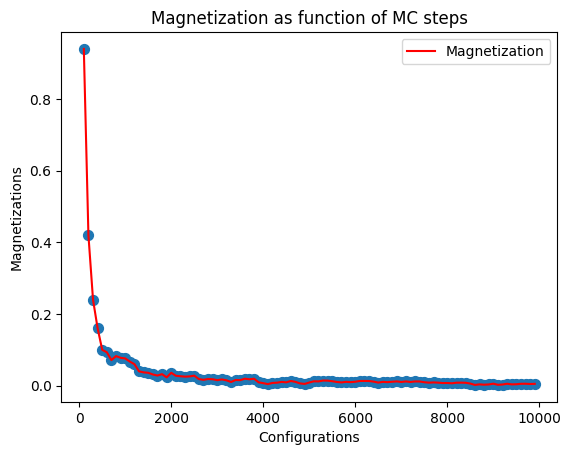

In [38]:
# Plots
plt.scatter(range(0, 10000, 100), magnetizations, s=50)
plt.plot(range(0, 10000, 100), magnetizations, color='r',label="Magnetization")
plt.xlabel("Configurations")
plt.ylabel("Magnetizations")
plt.title("Magnetization as function of MC steps")
plt.legend()
plt.show()